# Model Project

In [38]:
## Importing packages 

import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
sm.init_printing(use_unicode=True)
import matplotlib.pyplot as plt
import math

In [13]:
# CODE WE MAY OR MAY NOT NEED

# SYMBOLS


# EQUATIONS
gross_output=sm.Eq(Q,((K**alpha)*(B*L)**(1-alpha)))
net_output=sm.Eq(Y,((1-theta)*Q))

capital_acc=sm.Eq(K_t,(s*Y-delta*K))
evo_lab=sm.Eq(L,(L_0*sm.exp(n*t)))
tech_prog=sm.Eq(B,((B_0*sm.exp(g_b*t))))

theta_f=sm.Eq(theta,(R/Q))
tot_emis=sm.Eq(E,(Omega_0*sm.exp(-g_a*t)*Q*(1-theta)**epsilon))
evo_emis_coef=sm.Eq(Omega_t,(-g_a*Omega))
emis_coef=sm.Eq(Omega,(Omega_0*sm.exp(-g_a*t)))

evo_emis_coef2=sm.Eq(0,(-g_a*Omega)-Omega_t)
emis_coef2=sm.Eq(0,(Omega_0*sm.exp(-g_a*t))-Omega)

## The Green Solow Model

Our assignment builds on the original Solow model that was presented by Solow and Swan (1956). The standard Solow model is given by these equations:  
$Q=F(K,BL)=K^\alpha BL^{1-\alpha},$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   $1>\alpha>0$    
$\dot{K}=sY-\delta K$  
$\dot{L}=nL \Rightarrow L=L_0 e^{nt} $  
$\dot{B}=g_B B \Rightarrow B=B_0 e^{g_Bt},$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $1>g_B>0$

The first equation shows a simple Cobb-Douglas production function where the production of gross output, Q, is made through Capital, K, and effective labour, BL. It can be shown that the production function exhibits constant return to scale.  
The second equation is describing the evolution of capital, where, s, is a fixed savings rate of net output, Y. From equation 2 we see that the capital is assumed to depreciate with a constant rate, $\delta$.  
The third equation presents the evolution of workers over time. We notice that the evoulution is given by a constant growth rate, n. 
Lastly, we see that the technological progress in the production of output is given by the exogenous growth rate, $g_B$.

In this assignment we will be working with an exstention of the original Solow model. Namely, we will work with the Green Solow model developed by William A. Brock and M. Scott Taylor (2004). In their model they add a function describing total emissions, E, given by:  
$E=\Omega Q-\Omega A(Q,R)$  
This simply shows that total emissions is given by the amount of pullution produced minus the amount of pollution abated.  
$\Omega$ is the fraction of pollution arising from the production of gross output, Q. It is important to notice that it is assumed that every unit of output generates the same fraction of pollution. Further, the equation shows that abatement exists in the economy. $(A(Q,R))$. The abatement has a negative effect on the total amount of emissions. Hence, abatement reduces the amount of pollution released into the atmosphere.

In the Green Solow model it is assumed that the abatement function is a concave function that is increasing with gross output, Q, and the economy's effort at abatement, R. Hence, abatement has a diminishing effect on total emissions.

When considering the Green Solow model there must be a lower amount available for consumption and investment due to the inclusion of abatement. We define this net output (income) as Y:  
$Y=Q-R=(1-\theta)Q$  
We can rewrite this in order to understand how emissions are being affected in the Green Solow model.  
$E=\Omega (Q-A(Q,R))$  
$E=\Omega Q(1-A(1,\frac{R}{Q})$  
$E=\Omega Q \alpha(\theta),$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\theta \equiv \frac{R}{Q}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\alpha(\theta) \equiv 1-A(1,\theta)$

We notice that the emissions are affected by the scale of economic activity, Q. Further, we notice that the abatement intensity, $\theta$ is assumed constant. There are more underlying mechanism in the Green Solow model such as the development in the fraction $\Omega$ that we won't go into detail with due to the focus of this assignment.

We are able to derive the model in output per effective worker since the production function has constant returns to scale. This implies that:  
$Q=K^\alpha (BL)^{1-\alpha} \Rightarrow q=k^\alpha$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $q\equiv \frac{Q}{BL},$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $k\equiv \frac{K}{BL}$

Using the above definitons we are now able to calculate the transition equation for capital per effective worker. When using the second equation and **the definitons just given** we get the following transition equation for capital per effective worker:  
$\dot{k}=s(1-\theta)k^\alpha-k(\delta+g_B+n)$

It can be shown that the growth rate for total emissions is given by:  
$\frac{\dot{E}}{E}=g_E+\alpha \frac{\dot{k}}{k},$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $g_E\equiv g_B+n-g_A$

When substituting for $\frac{\dot{k}}{k}$ we get:  
$\frac{\dot{E}}{E}=\alpha s(1-\theta)k^{\alpha-1}-[\alpha(\delta+g_B+n)-g_E]$

When considering this equation we notice that the emissions will peak ($\dot{E}=0$) when $\alpha s(1-\theta)k^{\alpha-1}=[\alpha(\delta+g_B+n)-g_E]$

In [45]:
# Stating the symbols and expressions used in the model

# Symbols
K = sm.symbols('K')
L = sm.symbols('L')
Y = sm.symbols('Y')
B = sm.symbols('B')
Q = sm.symbols('Q')
R = sm.symbols('R')
E = sm.symbols('E')
z = sm.symbols('z')
Omega = sm.symbols('Omega')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g_a = sm.symbols('g_a')
n = sm.symbols('n')
theta = sm.symbols('theta')
A = sm.symbols('A')
epsilon = sm.symbols('epsilon')
B_t = sm.symbols('B_t')
K_t = sm.symbols('K_t')
L_t = sm.symbols('L_t')
Omega_t = sm.symbols('Omega_t')
k_t = sm.symbols('k_t')
k = sm.symbols('k')
y = sm.symbols('y')
L_0 = sm.symbols('L_0')
t = sm.symbols('t')
g_b = sm.symbols('g_b')
B_0 = sm.symbols('B_0')
Omega_0 = sm.symbols('Omega_0')

# Expressions
f=k**alpha #Gross output pr. effective worker

## 1. Steady State of The Green Solow Model

Firstly we want to find the steady state of the Green Solow Model. In steady state capital does not change over time meaning that $\dot{k}$ is equal to zero. We do this by setting the transition equation (as it is stated above) equal to zero and solving for capital, k.

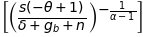

In [40]:
# Stating the transition equation and setting it equal to zero
tc=sm.Eq(0,(s*(1-theta)*k**alpha-(delta+g_b+n)*k)) 

# Solving the transition equation (tc) for k
tcc=sm.solve(tc,k)
tcc

### 1.1  Analytical solution
By stating the parameters and some realistic examples of parameter values we can find a numerical value for capital i the steady state.

In [41]:
# Convert our tcc sympy function into a lambda function, making it possible to calculate a numerical values solution.
tc_func = sm.lambdify((s,g_b,n,delta,alpha,theta),tcc)
    
# Adding numerical values to our parameters
tc_func(0.25,0.015,0.01,0.035,0.25,0.05)

In steady state capital is equal to 6.26.

### 1.2 Numerical Solution

We also try to solve for capital in the steady state analytically.

In [49]:
# Assigning parameter values
#s = 0.25
#g_b = 0.015
#n = 0.01
#alpha = 0.25
#delta = 0.035
#theta = 0.05

# Defining the transition equation as a lambda function
#obj_kss = lambda k: 0 - (s*(1-theta)*k**alpha-(delta+g_b+n)*k)

# Using the optimize.newton function to find a numerical solution for steady state
#result = optimize.newton(obj_kss, x0=1)
#result


The numerical solution is as expected the same as the analytical.

## 2. Emissions in the Green Solow Model

The Green Solow Model also predicts when the peak of emission occur depending on the abatement intensity, $\theta$. In the following  we solve for k, at the peak of emissions like we did with the transitions equation. We use the emission euqation (...) for this. As emissions over time does not change at the peak we set $\dot{E}$ equal zero.
We choose only to use an analytical solution when solving for k at the peak of emissions.

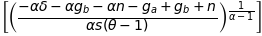

In [46]:
# Stating the emision equation and setting it equal to zero
max_emis=sm.Eq(0,(alpha*s*(1-theta)*k**(alpha-1)-(alpha*(delta+g_b+n)-(g_b+n-g_a))))

# Solving the emission equation (max_emis) for k
max_emis_k=sm.solve(max_emis,k)
max_emis_k


In [47]:
max_emis_func = sm.lambdify((s,g_b,n,delta,alpha,theta,g_a),max_emis_k)
max_emis_func(0.25,0.015,0.01,0.035,0.25,0.05,0.03)